# Przygotowanie środowiska

In [58]:
import os
import pandas as pd
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import cufflinks as cf

In [59]:
from platform import python_version
python_version()

'3.11.7'

# Przygotowanie danych do analizy

In [60]:
from pandas.core.indexes import base
os.getcwd()

'/Users/dominikabalcerowska/Downloads/SUML_GR1_TMWT-main'

In [61]:
base_data = pd.read_csv("data/weatherAUS.csv")

In [62]:
base_data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [63]:
print(base_data)

              Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ... 

In [64]:
base_data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [65]:
categorical = [var for var in base_data.columns if base_data[var].dtype == 'O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [66]:
base_data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Kolumny z największymi ilościami brakujących danych to Cloud9am (38%), Cloud3pm (41%), Evaporation (43%) oraz Sunshine (48%).

In [67]:
print(base_data.shape[0])

145460


In [68]:
cloud9am_mean = base_data['Cloud9am'].mean()
cloud3pm_mean = base_data['Cloud3pm'].mean()

print("Average Cloud9am:", cloud9am_mean)
print("Average Cloud3pm:", cloud3pm_mean)

Average Cloud9am: 4.4474612602152455
Average Cloud3pm: 4.509930082924903


<Axes: >

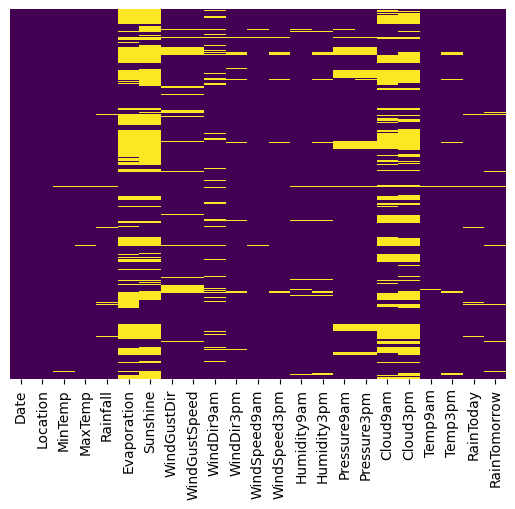

In [69]:
sns.heatmap(base_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [70]:
base_data['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [71]:
import pandas as pd

# Słownik zawierający australijskie miasta i ich współrzędne
australian_cities = {
    "Albury": (-36.0736, 146.9135),
    "BadgerysCreek": (-33.8500, 150.7500),
    "Cobar": (-31.5500, 145.8333),
    "CoffsHarbour": (-30.3000, 153.1333),
    "Moree": (-29.4667, 149.8500),
    "Newcastle": (-32.9333, 151.7500),
    "NorahHead": (-33.2833, 151.5667),
    "NorfolkIsland": (-29.0333, 167.9500),
    "Penrith": (-33.7500, 150.7000),
    "Richmond": (-33.6167, 150.7500),
    "Sydney": (-33.8688, 151.2093),
    "SydneyAirport": (-33.9461, 151.1772),
    "WaggaWagga": (-35.1167, 147.4667),
    "Williamtown": (-32.8500, 151.8167),
    "Wollongong": (-34.4250, 150.8833),
    "Canberra": (-35.3075, 149.1244),
    "Tuggeranong": (-35.4235, 149.0754),
    "MountGinini": (-35.5500, 148.7500),
    "Ballarat": (-37.5500, 143.8500),
    "Bendigo": (-36.7667, 144.2667),
    "Sale": (-38.1167, 147.0667),
    "MelbourneAirport": (-37.6667, 144.8333),
    "Melbourne": (-37.8136, 144.9631),
    "Mildura": (-34.2000, 142.1500),
    "Nhil": (-38.2500, 141.6667),
    "Portland": (-38.3500, 141.6167),
    "Watsonia": (-37.7167, 145.0500),
    "Dartmoor": (-37.9167, 141.2500),
    "Brisbane": (-27.4698, 153.0251),
    "Cairns": (-16.9167, 145.7667),
    "GoldCoast": (-28.0167, 153.4000),
    "Townsville": (-19.2500, 146.8000),
    "Adelaide": (-34.9333, 138.5833),
    "MountGambier": (-37.8333, 140.7667),
    "Nuriootpa": (-34.4667, 139.0000),
    "Woomera": (-31.1500, 136.8167),
    "Albany": (-35.0167, 117.850),
    "Witchcliffe": (-33.9500, 115.1833),
    "PearceRAAF": (-31.9167, 115.9500),
    "PerthAirport": (-31.9417, 115.9625),
    "Perth": (-31.9522, 115.8589),
    "SalmonGums": (-33.5667, 123.0833),
    "Walpole": (-34.3667, 116.4167),
    "Hobart": (-42.8806, 147.3256),
    "Launceston": (-41.4593, 147.1472),
    "AliceSprings": (-23.6972, 134.9959),
    "Darwin": (-12.4631, 130.8411),
    "Katherine": (-14.4667, 132.4500),
    "Uluru": (-25.3458, 132.8639)
}

# Stwórz lub wczytaj DataFrame z kolumną "Location" zawierającą tylko podane miasta

# Utwórz nową kolumnę "Coordinates" mapującą miasta na współrzędne z słownika
base_data["Coordinates"] = base_data["Location"].map(australian_cities)

# Wyświetl wynikowy DataFrame
print(base_data)

              Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
0            NaN           W           44.0          W  ... 

<Axes: >

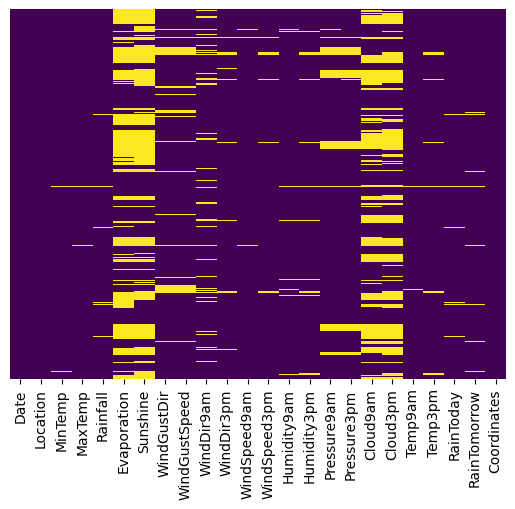

In [72]:
sns.heatmap(base_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [73]:
def clean_data(base_data):
    # przekształć datę na typ datetime
    base_data['Date'] = pd.to_datetime(base_data['Date'])

    # wyodrębnij rok z daty
    base_data['Year'] = base_data['Date'].dt.year

    # wyodrębnij miesiąc z daty
    base_data['Month'] = base_data['Date'].dt.month

    # wyodrębnij dzień z daty
    base_data['Day'] = base_data['Date'].dt.day
    # usuń kolumnę 'Date'
    base_data.drop('Date', axis=1, inplace=True)
    # Usuń kolumnę: 'Sunshine'
    base_data = base_data.drop(columns=['Sunshine'])
    # Usuń kolumnę: 'Evaporation'
    base_data = base_data.drop(columns=['Evaporation'])
    # Usuń kolumnę: 'Cloud9am'
    base_data = base_data.drop(columns=['Cloud9am'])
    # Usuń kolumnę: 'Cloud3pm'
    base_data = base_data.drop(columns=['Cloud3pm'])

    # Zastąp brakujące wartości medianą każdej kolumny w: 'MinTemp', 'MaxTemp' i 10 innych kolumnach
    base_data = base_data.fillna({'MinTemp': base_data['MinTemp'].median(), 'MaxTemp': base_data['MaxTemp'].median(), 'Rainfall': base_data['Rainfall'].ffill(), 'WindGustSpeed': base_data['WindGustSpeed'].median(), 'WindSpeed9am': base_data['WindSpeed9am'].median(), 'WindSpeed3pm': base_data['WindSpeed3pm'].median(
    ), 'Humidity9am': base_data['Humidity9am'].median(), 'Humidity3pm': base_data['Humidity3pm'].median(), 'Pressure9am': base_data['Pressure9am'].median(), 'Pressure3pm': base_data['Pressure3pm'].median(), 'Temp9am': base_data['Temp9am'].median(), 'Temp3pm': base_data['Temp3pm'].median()})

    # Zastąp braki wartościami z poprzedniego ważnego wpisu w: 'RainToday', 'RainTomorrow'
    base_data = base_data.fillna({'RainToday': base_data['RainToday'].ffill(
    ), 'RainTomorrow': base_data['RainTomorrow'].ffill()})

    # Zastąp braki wartościami z poprzedniego ważnego wpisu w: 'WindGustDir', 'WindDir9am', 'WindDir3pm'
    base_data = base_data.fillna({'WindGustDir': base_data['WindGustDir'].ffill(
    ), 'WindDir9am': base_data['WindDir9am'].ffill(), 'WindDir3pm': base_data['WindDir3pm'].ffill()})
    return base_data


base_data_clean = clean_data(base_data.copy())
base_data_clean.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Coordinates,Year,Month,Day
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,...,1007.7,1007.1,16.9,21.8,No,No,"(-36.0736, 146.9135)",2008,12,1
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,...,1010.6,1007.8,17.2,24.3,No,No,"(-36.0736, 146.9135)",2008,12,2
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,...,1007.6,1008.7,21.0,23.2,No,No,"(-36.0736, 146.9135)",2008,12,3
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,...,1017.6,1012.8,18.1,26.5,No,No,"(-36.0736, 146.9135)",2008,12,4
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,...,1010.8,1006.0,17.8,29.7,No,No,"(-36.0736, 146.9135)",2008,12,5


<Axes: >

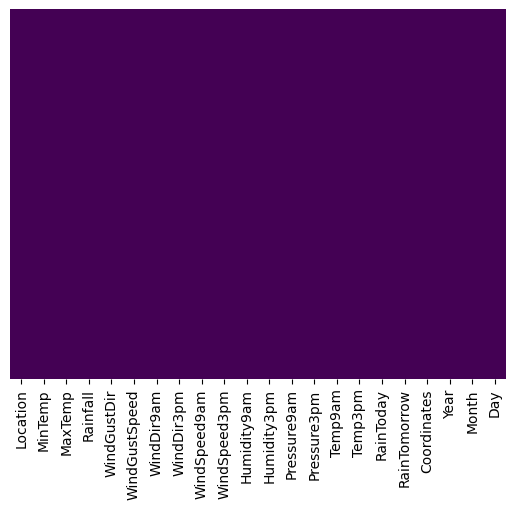

In [74]:
sns.heatmap(base_data_clean.isnull(), yticklabels=False,
            cbar=False, cmap='viridis')

In [75]:
# Utworzenie zmiennych dummy dla kolumn: 'Location', 'RainToday', 'WindDir9am', 'WindDir3pm', 'WindGustDir', 'Coordinates'

pd.get_dummies(base_data_clean.Location, drop_first=True).head()
pd.get_dummies(base_data_clean.RainToday,
               drop_first=True, dummy_na=True).head()
pd.get_dummies(base_data_clean.WindDir9am,
               drop_first=True, dummy_na=True).head()
pd.get_dummies(base_data_clean.WindDir3pm,
               drop_first=True, dummy_na=True).head()
pd.get_dummies(base_data_clean.WindGustDir,
               drop_first=True, dummy_na=True).head()
pd.get_dummies(base_data_clean.Coordinates,
               drop_first=True, dummy_na=True).head()

,"(-41.4593, 147.1472)","(-38.35, 141.6167)","(-38.25, 141.6667)","(-38.1167, 147.0667)","(-37.9167, 141.25)","(-37.8333, 140.7667)","(-37.8136, 144.9631)","(-37.7167, 145.05)","(-37.6667, 144.8333)","(-37.55, 143.85)",...,"(-29.0333, 167.95)","(-28.0167, 153.4)","(-27.4698, 153.0251)","(-25.3458, 132.8639)","(-23.6972, 134.9959)","(-19.25, 146.8)","(-16.9167, 145.7667)","(-14.4667, 132.45)","(-12.4631, 130.8411)",NaN
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [76]:
base_data_clean['Coordinates'][:1]

0    (-36.0736, 146.9135)
Name: Coordinates, dtype: object

In [77]:
# Przekształć kolumnę 'date' na typ datetime

# Tworzymy dataframe dla każdego roku i zapisujemy go do pliku .csv
for year, data in base_data_clean.groupby(base_data_clean['Year']):
    data.to_csv(os.path.join('data', f'data{year}.csv'), index=False)

In [78]:
data.to_csv(os.path.join('data', 'cleandata.csv'), index=False)

# Pobranie i przetestowanie próbki z danych

<Axes: >

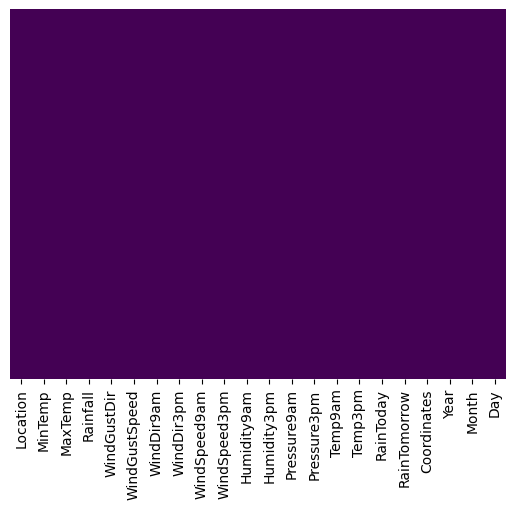

In [79]:
test_data = pd.read_csv('data/data2013.csv')
sns.heatmap(test_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')